In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error, mean_absolute_error, classification_report, confusion_matrix

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
data = pd.read_csv(url)
data.columns = ["Recency", "Frequency", "Monetary", "Time", "Target"]

In [4]:
print(data.isnull().sum())

Recency      0
Frequency    0
Monetary     0
Time         0
Target       0
dtype: int64


In [5]:
data = data.fillna(method='ffill')

C:\Users\Vishnu\AppData\Local\Temp\ipykernel_3788\917065080.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [6]:
print("Duplicates:", data.duplicated().sum())

Duplicates: 215


In [7]:
data = data.drop_duplicates()

In [8]:
print(data.dtypes)

Recency      int64
Frequency    int64
Monetary     int64
Time         int64
Target       int64
dtype: object


In [9]:
data['Recency'] = pd.to_numeric(data['Recency'], errors='coerce')
data['Frequency'] = pd.to_numeric(data['Frequency'], errors='coerce')
data['Monetary'] = pd.to_numeric(data['Monetary'], errors='coerce')
data['Time'] = pd.to_numeric(data['Time'], errors='coerce')
data['Target'] = data['Target'].astype(int)

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Recency', 'Frequency', 'Monetary', 'Time']] = scaler.fit_transform(data[['Recency', 'Frequency', 'Monetary', 'Time']])

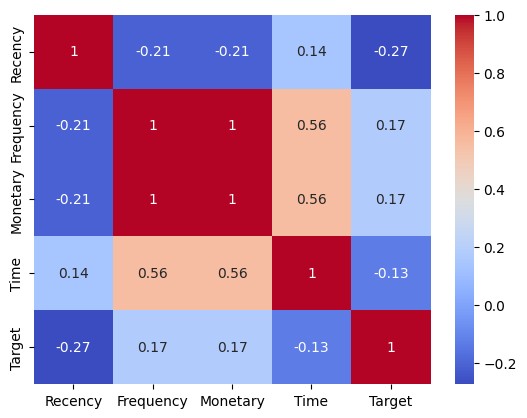

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

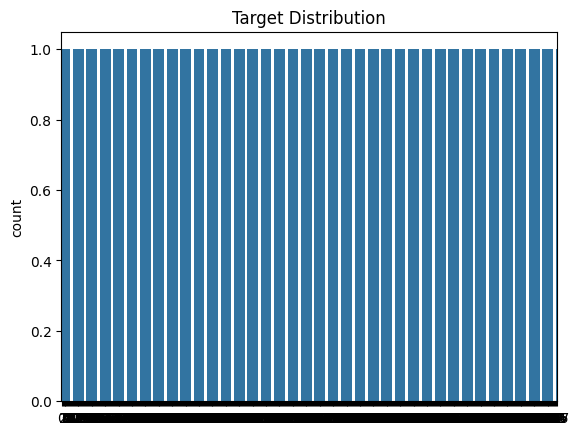

In [12]:
sns.countplot(data['Target'])
plt.title("Target Distribution")
plt.show()

In [14]:
X = data[['Recency', 'Frequency', 'Monetary', 'Time']]
y = data['Target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
start_time = time.time()
model = GaussianNB()
model.fit(X_train, y_train)
train_time = time.time() - start_time

In [17]:
start_time = time.time()
y_prob = model.predict(X_test)  
y_pred_proba = model.predict_proba(X_test)[:, 1] 
test_time = time.time() - start_time

In [47]:
log_loss_value = log_loss(y_test, y_pred_proba)
mse_value = mean_squared_error(y_test, y_pred_proba)
mae_value = mean_absolute_error(y_test, y_pred_proba)
accuracy_value = accuracy_score(y_test, y_prob)

In [49]:
print(f"Log Loss: {log_loss_value:.4f}")
print(f"Mean Squared Error: {mse_value:.4f}")
print(f"Mean Absolute Error (MAE): {mae_value:.4f}")
print(f"Accuracy: {accuracy_value:.4f}")
print(f"  Training Time: {train_time:.4f} seconds")
print(f"  Testing Time: {test_time:.4f} seconds")

Log Loss: 0.7824
Mean Squared Error: 0.1946
Mean Absolute Error (MAE): 0.3440
Accuracy: 0.7125
  Training Time: 0.0040 seconds
  Testing Time: 0.0070 seconds


In [21]:
metrics = ["Log Loss", "Mean Squared Error","Mean Absolute Error", "Accuracy"]
values = [log_loss_value, mse_value, mae_value, accuracy_value]

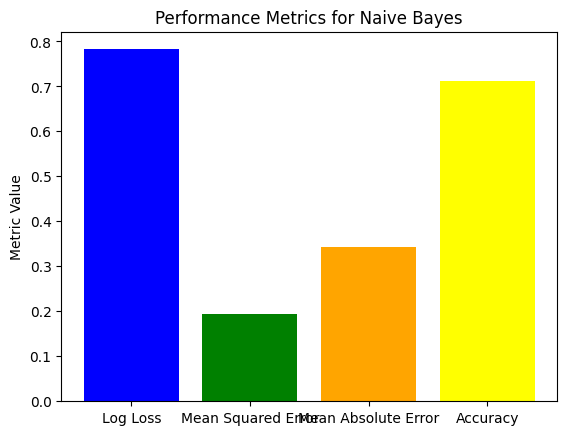

In [22]:
plt.bar(metrics, values, color=['blue', 'green', 'orange','yellow'])
plt.title("Performance Metrics for Naive Bayes")
plt.ylabel("Metric Value")
plt.show()

In [32]:
print("\nClassification Report for Naive Bayes :")
print(classification_report(y_test, y_prob))


Classification Report for Naive Bayes :
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       118
           1       0.41      0.21      0.28        42

    accuracy                           0.71       160
   macro avg       0.58      0.55      0.55       160
weighted avg       0.67      0.71      0.68       160

